In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [2]:
data = pd.read_csv('las_vegas_airbnb_data.csv')

## Transformation & Data Cleaning

In [3]:
transformation_dictionary = {
    'Entire home': 'House Level',
    'Room in hotel': 'Room Level',
    'Entire condo': 'House Level',
    'Entire serviced apartment': 'House Level',
    'Entire rental unit': 'House Level',
    'Private room in home': 'Room Level',
    'Entire villa': 'House Level',
    'Private room in resort': 'Room Level',
    'Entire guest suite': 'House Level',
    'Private room in rental unit': 'Room Level',
    'Entire townhouse': 'House Level',
    'Entire guesthouse': 'House Level',
    'Private room in townhouse': 'Room Level',
    'Entire bungalow': 'House Level',
    'Private room in guesthouse': 'Room Level',
    'Private room in guest suite': 'Room Level',
    'Private room in villa': 'Room Level',
    'Tiny home': 'House Level',
    'Room in aparthotel': 'Room Level',
    'Private room in condo': 'Room Level',
    'Entire vacation home': 'House Level',
    'Room in boutique hotel': 'Room Level',
    'Camper/RV': 'House Level',
    'Room in serviced apartment': 'Room Level',
    'Entire resort': 'House Level',
    'Tower': 'House Level',
    'Private room in bungalow': 'Room Level',
    'Entire place': 'House Level',
    'Shared room in resort': 'Room Level',
    'Shared room in hotel': 'Room Level',
    'Entire loft': 'House Level',
    'Private room in casa particular': 'Room Level'
}

data['EnvLevel'] = data.roomType.replace(transformation_dictionary)

In [4]:
address_transformation_dictionary = {
    'Las Vegas, Nevada, United States': 'Central',
    'Henderson, Nevada, United States': 'South',
    'North Las Vegas, Nevada, United States': 'North',
    'Paradise, Nevada, United States': 'South',
    'Las vegas , Nevada, United States': 'Central',  # Assuming this is meant to be 'Las Vegas'
    'Las Vegas , Nevada, United States': 'Central',  # Assuming this is meant to be 'Las Vegas'
    'Lake Las Vegas, Henderson, Nevada, United States': 'South'
}

data['AtLocationFrom'] = data['address'].replace(address_transformation_dictionary)

In [5]:
companies_dict = {'888': 'Company', 'Suiteness': 'Company', 'Las Vegas Condo Rentals': 'Company', 'StripViewSuites': 'Company', 'LasVegasSuites': 'Company', 'Sky702': 'Company', 'Escape Travel Club': 'Company', 'Getaways': 'Company', 'One Fine BNB LLC': 'Company', 'Enterprise LLC': 'Company', 'Hostit': 'Company', 'Italian Cottage': 'Company', 'Cece': 'Company', 'Plushy': 'Company', 'Sunset': 'Company', 'Trifecta Realty And': 'Company', 'Ceo Suites': 'Company', 'Concierge': 'Company', 'Luxury Hotels': 'Company', 'SAHARA Las Vegas': 'Company', 'CunninghamGroupMTR': 'Company', 'Vegasbnb': 'Company', 'RoomPicks': 'Company', 'The Ivy': 'Company', 'Your Las Vegas Stay': 'Company', 'Bnv': 'Company', 'Relocation': 'Company', 'DVR Tamarron': 'Company', 'InvitingSpaces': 'Company', 'Desert Mouse Vacation Rentals': 'Company', 'DragonVegas': 'Company'}
data['RentalBusiness'] = data['primaryHost/smartName'].replace(companies_dict).fillna('Person')
data['RentalBusiness'] = data['RentalBusiness'].apply(lambda name: name if name =='Company' else 'Family' if '&' in name.lower() or 'and' in name.lower() or ',' in name.lower() else 'Person')

In [6]:
data['firstReviewComments'] = data['firstReviewComments'].fillna('Not A Comment')
data['CommentSubjectivity'] = data['firstReviewComments'].apply(lambda comment: nlp(comment)._.subjectivity if comment != 'Not A Comment' else 0)
data['CommentPolarity'] = data['firstReviewComments'].apply(lambda comment: nlp(comment)._.polarity if comment != 'Not A Comment' else 0)
data['isValidComment'] = data['firstReviewComments'].apply(lambda comment: 1 if comment != 'Not A Comment' else 0)

In [7]:
valid_data = data[['stars','numberOfGuests','firstReviewRating','EnvLevel','AtLocationFrom','RentalBusiness','CommentSubjectivity','CommentPolarity','isValidComment']]

In [8]:
valid_data

,stars,numberOfGuests,firstReviewRating,EnvLevel,AtLocationFrom,RentalBusiness,CommentSubjectivity,CommentPolarity,isValidComment
0,4.54,4,4.0,House Level,Central,Person,0.593485,-0.142803,1
1,4.39,4,5.0,House Level,Central,Person,0.337037,0.035880,1
2,NaN,4,5.0,House Level,Central,Family,0.000000,0.000000,1
3,NaN,6,5.0,House Level,Central,Family,0.750000,0.461111,1
4,4.51,2,5.0,Room Level,Central,Person,0.433333,0.291667,1
...,...,...,...,...,...,...,...,...,...
995,5.00,4,5.0,House Level,Central,Person,0.568333,0.190625,1
996,4.77,7,5.0,House Level,South,Company,0.361111,0.266667,1
997,4.93,2,5.0,House Level,South,Company,0.625000,0.322254,1
998,5.00,8,5.0,House Level,Central,Person,0.569697,0.278030,1


## Analysis

### Are People Happier in an specific place?

In [9]:
numeric_columns = valid_data.select_dtypes(include=['int', 'float']).columns.to_list()
object_columns = valid_data.select_dtypes(include=['object']).columns.to_list()

In [10]:
object_columns

['EnvLevel', 'AtLocationFrom', 'RentalBusiness']

#### Happier in Person, Family or Business?

Text(0.5, 1.0, 'Distribution of Polarity per Rental Level')

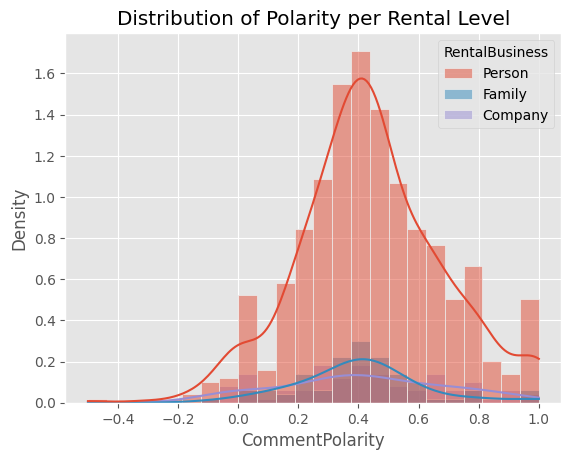

In [11]:
fig, ax = plt.subplots()
sns.histplot(
    data=valid_data[valid_data['isValidComment']==1],
    x='CommentPolarity',
    hue='RentalBusiness',
    kde=True,
    stat='density', ax=ax)
ax.set_title('Distribution of Polarity per Rental Level')

In [12]:
valid_data[valid_data['isValidComment']==1][['RentalBusiness']+numeric_columns].groupby(['RentalBusiness']).agg({
    'CommentPolarity':['mean','std']
})

CommentPolarity          
                          mean       std
RentalBusiness                          
Company               0.419030  0.276878
Family                0.410817  0.213130
Person                0.441494  0.241608

#### Happier at North, South, Central?

Text(0.5, 1.0, 'Distribution of Polarity per Rental Location')

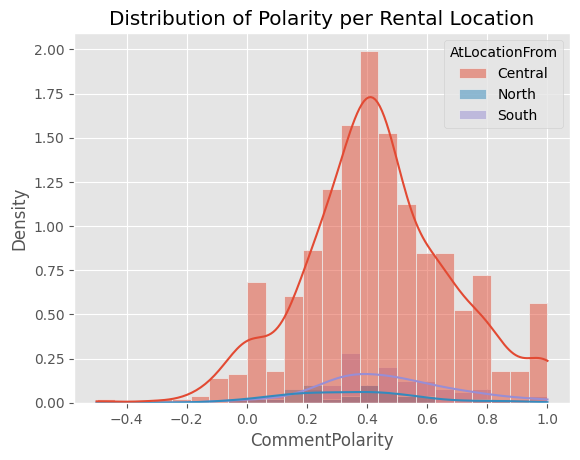

In [13]:
fig, ax = plt.subplots()
sns.histplot(
    data=valid_data[valid_data['isValidComment']==1],
    x='CommentPolarity',
    hue='AtLocationFrom',
    kde=True,
    stat='density', ax=ax)
ax.set_title('Distribution of Polarity per Rental Location')

In [14]:
valid_data[valid_data['isValidComment']==1][['AtLocationFrom']+numeric_columns].groupby(['AtLocationFrom']).agg({
    'CommentPolarity':['mean','std']
})

CommentPolarity          
                          mean       std
AtLocationFrom                          
Central               0.436838  0.245758
North                 0.348858  0.212343
South                 0.468284  0.215845

#### Happier in Rooms or Houses?

Text(0.5, 1.0, 'Distribution of Polarity per Rental Location')

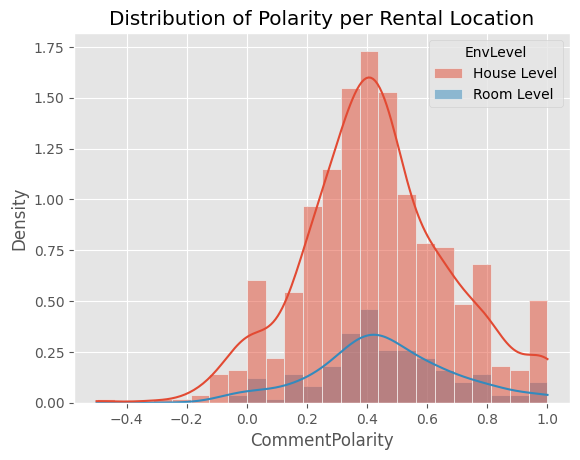

In [15]:
fig, ax = plt.subplots()
sns.histplot(
    data=valid_data[valid_data['isValidComment']==1],
    x='CommentPolarity',
    hue='EnvLevel',
    kde=True,
    stat='density', ax=ax)
ax.set_title('Distribution of Polarity per Rental Location')

In [16]:
valid_data[valid_data['isValidComment']==1][['EnvLevel']+numeric_columns].groupby(['EnvLevel']).agg({
    'CommentPolarity':['mean','std']
})

CommentPolarity          
                       mean       std
EnvLevel                             
House Level        0.431315  0.245338
Room Level         0.461012  0.228475

#### Conclusions

##### Recommendations:
- Prioritize Rooms at South from Person which at the moment are the combination that make the people happier
- This can be done in the reranking of rentals once a query is done which would mean this feature needs to be added in the backend service

##### Impact:
- Happier Clients have greater Life Time Value and more retention Rate which can be measured once people leave their comment and after the attribution window of retention


### Happier means more rating?

In [17]:
subset_data = valid_data[~valid_data['stars'].isna()]

In [18]:
subset_data['final_stars'] = subset_data['stars'].astype('int')

Text(0.5, 1.0, 'Distribution of Polarity by stars')

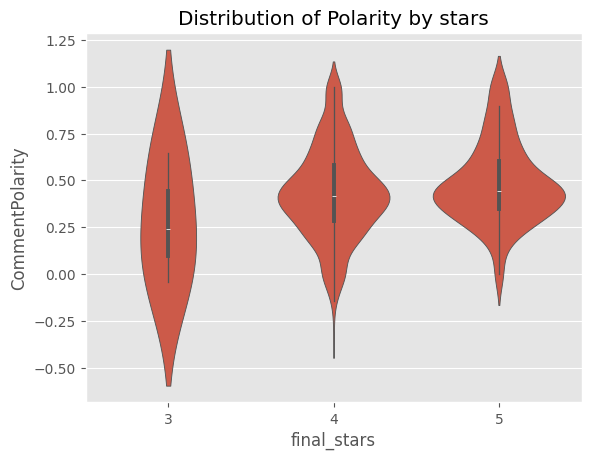

In [19]:
fig, ax = plt.subplots()
sns.violinplot(
    data=subset_data,
    x='final_stars',
    y='CommentPolarity',
    ax=ax
)
ax.set_title('Distribution of Polarity by stars')
# First Impression Matters, the more positive the first comment ist, the better rating the rental will have over the time

#### Conlusions

##### Recommendations:
- First Impression, we hace to hight light to those who rent their properties that the first impression and comment matter so that the have to give the best impression to have a success full rent history

##### Impact:
- Better Rated properties implies more interest from client to rent on opportunities incrementing the MRR, Revenue and even User Engagement

### Happier sharing with more people?

Text(0.5, 1.0, 'Polarity Vs Number of Guests in the Houses')

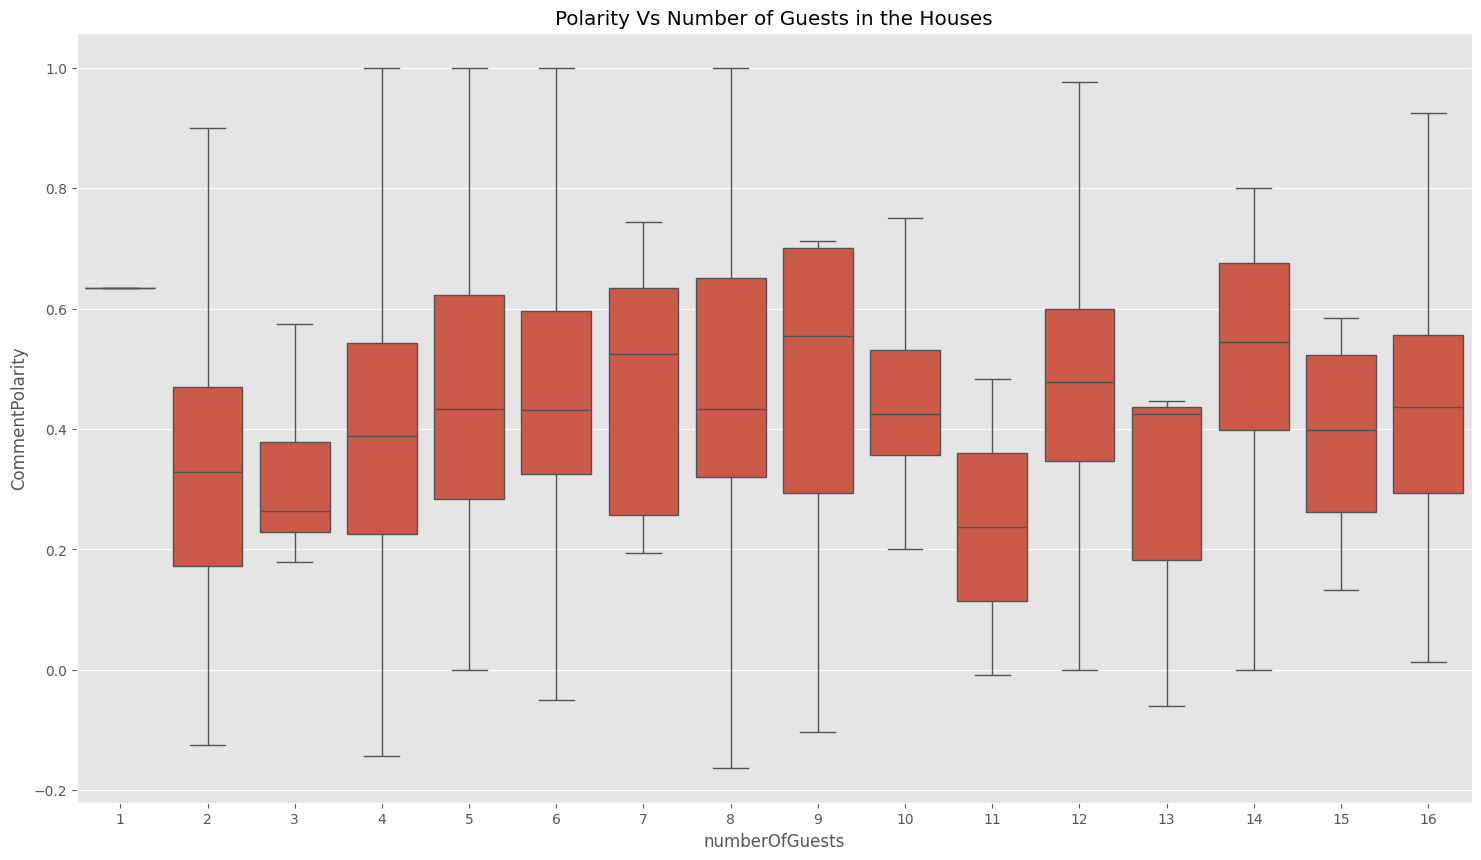

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(
    data=valid_data[(valid_data['isValidComment']==1)&(valid_data['EnvLevel']=='House Level')],
    x='numberOfGuests',
    y='CommentPolarity',
    #hue='EnvLevel'
    ax =ax,
    showfliers = False

)
ax.set_title('Polarity Vs Number of Guests in the Houses')

#### Conlusions

##### Recommendations:
- As number of guests allowed increase also Polarity grows, but this only happens till 9 guests. So for the best satisfaction of people the most recommended ones must be those from 2 to 9

##### Impact:
- Satisfaction of clients grwoth which makes the more engaged and increase retention rates, LTV and MRR

## Modeling

The Objective of this model will be to predict the final rating of a rental, so that it can be prioritzed whe users make a search or when creating recommendations

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

### Creating Process Transformer

In [22]:
class EnvLevelTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['EnvLevel'] = X['EnvLevel'].apply(lambda x: 1 if x == 'House Level' else 0)
        return X[['EnvLevel']]

class RentalBusinessTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        mapping = {'Person': 0, 'Family': 1, 'Company': 2}
        return X.replace(mapping)

class LocationFromTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        mapping = {'Central': 0, 'South': -1, 'North': 1}
        return X.replace(mapping)

In [23]:
class ClampPredictions(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        # Realizar predicciones
        predictions = self.model.predict(X)
        # Aplicar restricción al rango [1, 5]
        return np.round(np.clip(predictions, 1, 5),2)

### Subsetting Data

In [24]:
# Definir las columnas que serán Usadas
env_level_cols = ['EnvLevel']
rental_business_cols = ['RentalBusiness']
location_cols = ['AtLocationFrom']
numeric_cols = ['numberOfGuests','firstReviewRating','CommentSubjectivity','CommentPolarity']
valuable_subset = valid_data[~valid_data['stars'].isna()][['stars']+env_level_cols+rental_business_cols+location_cols+numeric_cols]

### Creating Model And Evualiating

In [25]:
# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('env_level', EnvLevelTransformer(), env_level_cols),
        ('rental_businnes', RentalBusinessTransformer(), rental_business_cols),
        ('location', LocationFromTransformer(), location_cols)
    ],
    remainder='drop'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ClampPredictions(
        GradientBoostingRegressor(random_state=42)
    ))  # Aplicar la restricción en las predicciones
])
X = valuable_subset.drop('stars',axis=1)
y = valuable_subset['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Entrenar el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('env_level',
                                                  EnvLevelTransformer(),
                                                  ['EnvLevel']),
                                                 ('rental_businnes',
                                                  RentalBusinessTransformer(),
                                                  ['RentalBusiness']),
                                                 ('location',
                                                  LocationFromTransformer(),
                                                  ['AtLocationFrom'])])),
                ('regressor',
                 ClampPredictions(model=GradientBoostingRegressor(random_state=42)))])

In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error en el conjunto de prueba:", mae)

def mean_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcular el Mean Percentage Error en el conjunto de prueba
mpe = mean_percentage_error(y_test, y_pred)
print("Mean Percentage Error en el conjunto de prueba:", mpe)

Mean Absolute Error en el conjunto de prueba: 0.12317972350230416
Mean Percentage Error en el conjunto de prueba: 2.639626748067194


### What about the Missing data?

In [28]:
missing_data = valid_data[valid_data['stars'].isna()][['stars']+env_level_cols+rental_business_cols+location_cols+numeric_cols+['isValidComment']]
missing_data

,stars,EnvLevel,RentalBusiness,AtLocationFrom,numberOfGuests,firstReviewRating,CommentSubjectivity,CommentPolarity,isValidComment
2,NaN,House Level,Family,Central,4,5.0,0.000000,0.000000,1
3,NaN,House Level,Family,Central,6,5.0,0.750000,0.461111,1
6,NaN,Room Level,Company,Central,4,NaN,0.000000,0.000000,0
8,NaN,Room Level,Company,Central,8,NaN,0.000000,0.000000,0
9,NaN,Room Level,Company,Central,4,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
917,NaN,Room Level,Person,South,2,NaN,0.000000,0.000000,0
935,NaN,House Level,Family,Central,8,4.0,0.650000,0.400000,1
963,NaN,House Level,Person,Central,4,5.0,0.830000,0.638333,1
973,NaN,Room Level,Person,Central,4,5.0,0.521429,0.340476,1


#### Imputing Values

In [29]:
subjectivity_imputer = valid_data['CommentSubjectivity'].mean()
polarity_imputer = valid_data['CommentPolarity'].mean()
first_review_rating = valid_data['firstReviewRating'].value_counts().index[0]

In [30]:
missing_data['CommentSubjectivity'] = missing_data.apply(
    lambda row: \
        subjectivity_imputer if row['isValidComment'] == 0 and row['CommentSubjectivity'] == 0.0 else row['CommentSubjectivity']
    , axis=1)

In [31]:
missing_data['CommentPolarity'] = missing_data.apply(
    lambda row: \
    polarity_imputer if row['isValidComment'] == 0 and row['CommentPolarity'] == 0.0 else row['CommentPolarity']
    , axis=1)

In [32]:
missing_data['firstReviewRating'] =missing_data['firstReviewRating'].fillna(first_review_rating)

#### Model Predictions

In [33]:
missing_data['predicted_stars'] = pipeline.predict(missing_data.drop('stars',axis=1))

In [34]:
missing_data

,stars,EnvLevel,RentalBusiness,AtLocationFrom,numberOfGuests,firstReviewRating,CommentSubjectivity,CommentPolarity,isValidComment,predicted_stars
2,NaN,House Level,Family,Central,4,5.0,0.000000,0.000000,1,4.82
3,NaN,House Level,Family,Central,6,5.0,0.750000,0.461111,1,4.82
6,NaN,Room Level,Company,Central,4,5.0,0.495487,0.346904,0,4.73
8,NaN,Room Level,Company,Central,8,5.0,0.495487,0.346904,0,4.73
9,NaN,Room Level,Company,Central,4,5.0,0.495487,0.346904,0,4.73
...,...,...,...,...,...,...,...,...,...,...
917,NaN,Room Level,Person,South,2,5.0,0.495487,0.346904,0,4.90
935,NaN,House Level,Family,Central,8,4.0,0.650000,0.400000,1,4.82
963,NaN,House Level,Person,Central,4,5.0,0.830000,0.638333,1,4.84
973,NaN,Room Level,Person,Central,4,5.0,0.521429,0.340476,1,4.91


### Conclusions

##### Recommendations
- The final model has a 2% percent error, which mean it predicts the final rating of a rental really Good
- The model also predicts for rental with missing data, which mean can be used on early stages rentals
- Generally the predictions are good and can be used for internal reranking on las vergas rental search

##### Impact
- As this helps people who rent their houses/room can be helped when their are starting their business
- Helps people to find better opportunities when looking for rentals
- Impacts Engagement, Recommendations ans satisfaction of the product Usage